In [30]:
import pandas as pd

# Column names based on OMNIWeb format
column_names = [
    "Year", "Day", "Hour", "DOY_frac", "R", "Dst", "AE", "AL", "AU", "Ap",
    "F107", "Kp1", "Kp2", "Kp3", "Kp4", "Kp5", "Kp6", "Kp7", "Kp8",
    "SW_speed", "SW_density", "SW_temp", "IMF_total", "IMF_Bx", "IMF_By", "IMF_Bz"
]

# Load the .dat file (ensure it's in the same folder as your notebook)
df = pd.read_fwf("omni2_1963.dat", header=None, widths=[4, 4, 4, 8] + [6]*22, names=column_names)

# Show the first 5 rows
print(df.shape)

df.head()


(8760, 26)


,Year,Day,Hour,DOY_frac,R,Dst,AE,AL,AU,Ap,...,Kp6,Kp7,Kp8,SW_speed,SW_density,SW_temp,IMF_total,IMF_Bx,IMF_By,IMF_Bz
0,1963,1,0,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99
1,1963,1,1,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99
2,1963,1,2,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99
3,1963,1,3,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99
4,1963,1,4,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99


In [16]:
# Create datetime from Year, Day of Year, and Hour
df['Datetime'] = pd.to_datetime(df['Year'] * 1000 + df['Day'], format='%Y%j') + pd.to_timedelta(df['Hour'], unit='h')
df.set_index('Datetime', inplace=True)
df.head()


,Year,Day,Hour,DOY_frac,R,Dst,AE,AL,AU,Ap,...,Kp6,Kp7,Kp8,SW_speed,SW_density,SW_temp,IMF_total,IMF_Bx,IMF_By,IMF_Bz
Datetime,,,,,,,,,,,,,,,,,,,,,
1963-01-01 00:00:00,1963,1,0,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99
1963-01-01 01:00:00,1963,1,1,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99
1963-01-01 02:00:00,1963,1,2,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99
1963-01-01 03:00:00,1963,1,3,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99
1963-01-01 04:00:00,1963,1,4,1771 99,99 999,999 9,99.9 9,99.9 9,99.9 9,99.9 9,...,99.9 9,99.9 9,99.9 9,99.9 9,999999,. 999.,9 9999,. 999.,9 999.,9 9.99


In [19]:
# Replace missing values (e.g., 999.9) with NaN
df.replace([9999.9, 999.9, 999.0, 99.99, 99999.0, 999999], pd.NA, inplace=True)

# Drop rows with missing key values
df.dropna(subset=['SW_speed', 'SW_density', 'IMF_Bz', 'Kp1'], inplace=True)


In [20]:
# Define storm condition based on Kp indices
def is_storm(row):
    return 1 if any(kp >= 5 for kp in [row['Kp1'], row['Kp2'], row['Kp3'], row['Kp4'],
                                       row['Kp5'], row['Kp6'], row['Kp7'], row['Kp8']]) else 0

df['storm'] = df.apply(is_storm, axis=1)
df[['storm']].value_counts()


Series([], Name: count, dtype: int64)

In [24]:
kp_cols = ['Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8']
print(df[kp_cols].head(10))


Empty DataFrame
Columns: [Kp1, Kp2, Kp3, Kp4, Kp5, Kp6, Kp7, Kp8]
Index: []


In [31]:
kp_cols = ['Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8']

# Convert to numeric, coerce errors to NaN
for col in kp_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where all Kp values are missing
df.dropna(subset=kp_cols, how='all', inplace=True)

# Print sample to verify
print(df[kp_cols].head())



      Kp1  Kp2  Kp3  Kp4  Kp5  Kp6  Kp7  Kp8
7934  1.5  0.2  1.5 -0.2  0.7  3.1  1.4  2.1
7935  0.1  1.8  0.5  1.7  0.4  1.0  0.5  0.7
7936  2.0  4.1  2.7  3.7  0.6  2.7  0.6  2.2
7937  0.8  3.6  1.2  3.5  1.4  3.7  2.0  1.6
7938  1.5  3.6  1.8  3.5  0.7  2.2  0.7  1.5


In [32]:
def is_storm(row):
    return 1 if any(kp >= 5 for kp in [row['Kp1'], row['Kp2'], row['Kp3'], row['Kp4'],
                                       row['Kp5'], row['Kp6'], row['Kp7'], row['Kp8']]) else 0

df['storm'] = df.apply(is_storm, axis=1)

# Show count of storm vs non-storm hours
print(df['storm'].value_counts())


storm
0    527
1    105
Name: count, dtype: int64


In [10]:
print(df.shape)


(0, 27)


In [29]:
print(df.columns.tolist())


['Year', 'Day', 'Hour', 'DOY_frac', 'R', 'Dst', 'AE', 'AL', 'AU', 'Ap', 'F107', 'Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8', 'SW_speed', 'SW_density', 'SW_temp', 'IMF_total', 'IMF_Bx', 'IMF_By', 'IMF_Bz', 'storm']


In [25]:
import pandas as pd

# Kp columns
kp_cols = ['Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8']

# Clean Kp values: handle strings like '4-', '5+', etc.
def parse_kp(kp_str):
    if pd.isna(kp_str):
        return None
    kp_str = str(kp_str).strip().replace('+', '.3').replace('-', '.0').replace('o', '.7')
    try:
        return float(kp_str)
    except:
        return None

# Apply cleaning
for col in kp_cols:
    df[col] = df[col].apply(parse_kp)

# Drop rows where all Kp values are missing
df.dropna(subset=kp_cols, how='all', inplace=True)

# Label storms: Kp ≥ 5 in any of the 8 values
def is_storm(row):
    return 1 if any(kp is not None and kp >= 5 for kp in [row[c] for c in kp_cols]) else 0

df['storm'] = df.apply(is_storm, axis=1)

# Count storm vs non-storm rows
print(df['storm'].value_counts())


Series([], Name: count, dtype: int64)


In [33]:
features = [
    'R', 'Dst', 'AE', 'AL', 'AU', 'Ap', 'F107',
    'SW_speed', 'SW_density', 'SW_temp',
    'IMF_total', 'IMF_Bx', 'IMF_By', 'IMF_Bz'
]
target = 'storm'


In [28]:

df_raw = pd.read_fwf("omni2_1963.dat", infer_nrows=100, inferWidths=True)
df_raw.head()


,1963,1,0,1771,99,99.1,999,999.1,999.9,999.9.1,...,99999.99.2,99999.99.3,99999.99.4,0.1,3,999.9.21,999.9.22,99999,99999.1,99.9
0,1963,1,1,1771,99,99,999,999,999.9,999.9,...,99999.99,99999.99,99999.99,0,3,999.9,999.9,99999,99999,99.9
1,1963,1,2,1771,99,99,999,999,999.9,999.9,...,99999.99,99999.99,99999.99,0,3,999.9,999.9,99999,99999,99.9
2,1963,1,3,1771,99,99,999,999,999.9,999.9,...,99999.99,99999.99,99999.99,0,7,999.9,999.9,99999,99999,99.9
3,1963,1,4,1771,99,99,999,999,999.9,999.9,...,99999.99,99999.99,99999.99,0,7,999.9,999.9,99999,99999,99.9
4,1963,1,5,1771,99,99,999,999,999.9,999.9,...,99999.99,99999.99,99999.99,0,7,999.9,999.9,99999,99999,99.9


In [35]:
# Convert all columns (except maybe your target) to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Check again
print(df.dtypes)


Year            int64
Day             int64
Hour            int64
DOY_frac      float64
R             float64
Dst             int64
AE            float64
AL            float64
AU            float64
Ap            float64
F107          float64
Kp1           float64
Kp2           float64
Kp3           float64
Kp4           float64
Kp5           float64
Kp6           float64
Kp7           float64
Kp8           float64
SW_speed      float64
SW_density      int64
SW_temp       float64
IMF_total     float64
IMF_Bx        float64
IMF_By        float64
IMF_Bz        float64
storm           int64
dtype: object


In [36]:
print(df.isnull().sum())


Year            0
Day             0
Hour            0
DOY_frac      632
R             632
Dst             0
AE              0
AL            201
AU            553
Ap              0
F107            3
Kp1             0
Kp2             3
Kp3             0
Kp4             0
Kp5             0
Kp6             0
Kp7             0
Kp8             0
SW_speed      632
SW_density      0
SW_temp       632
IMF_total     632
IMF_Bx        632
IMF_By        632
IMF_Bz        632
storm           0
dtype: int64


In [41]:

df.fillna(df.median(), inplace=True)
print((X_train.nunique() == 1).sum(), "constant columns found")


3 constant columns found


In [40]:
import numpy as np
print(X_train.isnull().sum())
print(np.isinf(X_train).sum())


Year            0
Day             0
Hour            0
DOY_frac      505
R             505
Dst             0
AE              0
AL              0
AU              0
Ap              0
F107            0
Kp1             0
Kp2             0
Kp3             0
Kp4             0
Kp5             0
Kp6             0
Kp7             0
Kp8             0
SW_speed      505
SW_density      0
SW_temp       505
IMF_total     505
IMF_Bx        505
IMF_By        505
IMF_Bz        505
dtype: int64
Year          0
Day           0
Hour          0
DOY_frac      0
R             0
Dst           0
AE            0
AL            0
AU            0
Ap            0
F107          0
Kp1           0
Kp2           0
Kp3           0
Kp4           0
Kp5           0
Kp6           0
Kp7           0
Kp8           0
SW_speed      0
SW_density    0
SW_temp       0
IMF_total     0
IMF_Bx        0
IMF_By        0
IMF_Bz        0
dtype: int64


In [42]:
constant_columns = [col for col in X_train.columns if X_train[col].nunique() == 1]
X_train.drop(columns=constant_columns, inplace=True)
X_test.drop(columns=constant_columns, inplace=True)


In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['storm'])
y = df['storm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [45]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [47]:
constant_cols = X_train.columns[X_train.nunique() <= 1]
print("Constant columns:", constant_cols)


Constant columns: Index(['DOY_frac', 'R', 'SW_speed', 'SW_temp', 'IMF_total', 'IMF_Bx', 'IMF_By',
       'IMF_Bz'],
      dtype='object')


In [48]:
X_train.drop(columns=constant_cols, inplace=True)
X_test.drop(columns=constant_cols, inplace=True)


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
[[101   0]
 [  0  26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        26

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



In [54]:

from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')  # No need for use_label_encoder

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
[[101   0]
 [  0  26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        26

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



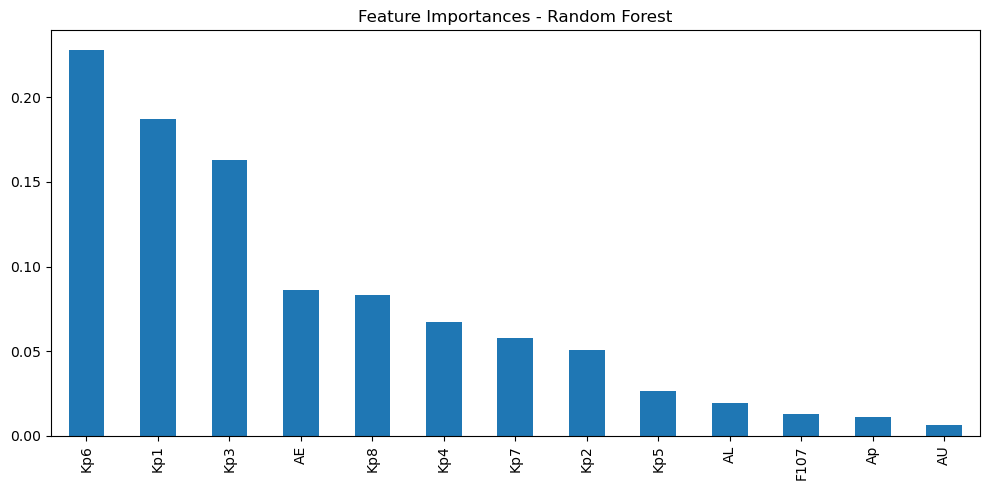

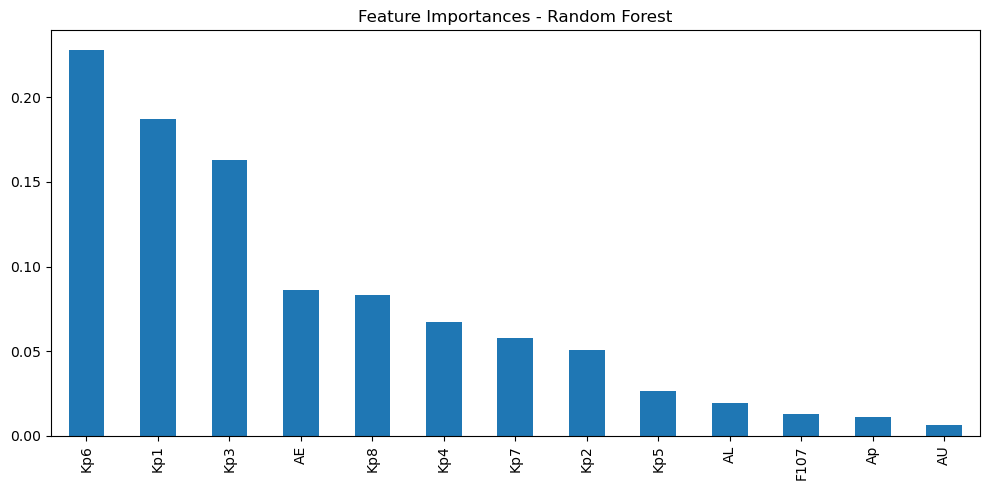

In [63]:
# Scale only selected features
# Scale only selected features
import matplotlib.pyplot as plt

selected_features = [
    'Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8',
    'AE', 'AL', 'AU', 'Ap', 'F107'
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

# Train the model
rf.fit(X_train_scaled, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=selected_features)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

selected_features = [
    'Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8',
    'AE', 'AL', 'AU', 'Ap', 'F107'
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

# Train the model
rf.fit(X_train_scaled, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=selected_features)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


In [64]:
xgb.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
# If 'SW_speed' and 'SW_temp' were dropped, reload or add them again
print(X_train.columns)  # Confirm they exist


Index(['Day', 'Hour', 'AE', 'AL', 'AU', 'Ap', 'F107', 'Kp1', 'Kp2', 'Kp3',
       'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8'],
      dtype='object')


In [66]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = xgb.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[101   0]
 [  0  26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        26

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.99009901 0.98019802 0.99009901 0.96039604 0.97029703]


In [68]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best params:", grid_search.best_params_)


Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [69]:
from xgboost import XGBClassifier

xgb_best = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_best.fit(X_train_scaled, y_train)
y_pred = xgb_best.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[101   0]
 [  0  26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        26

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



C:\Users\MOHD ASHHAD\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [70]:
import joblib

# Save the model
joblib.dump(xgb_best, 'xgb_storm_classifier.pkl')

# To load later:
# xgb_loaded = joblib.load('xgb_storm_classifier.pkl')


['xgb_storm_classifier.pkl']

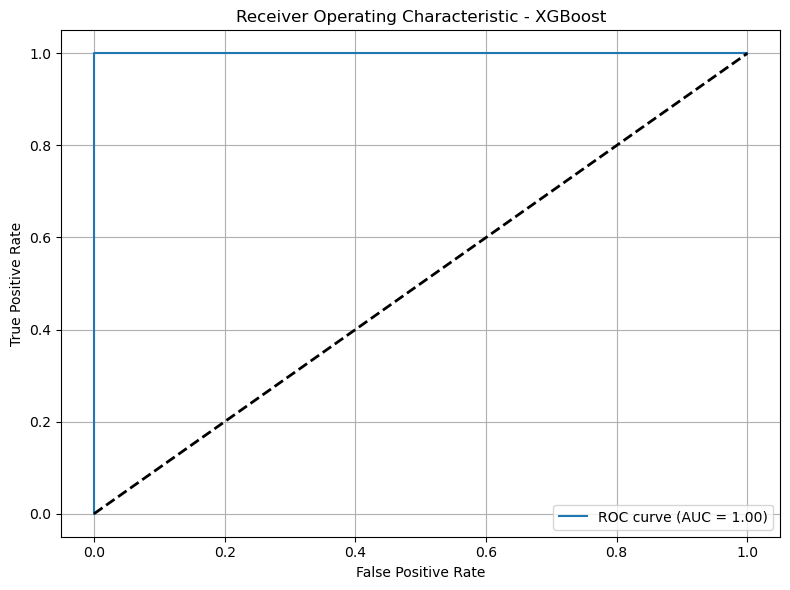

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = xgb_best.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


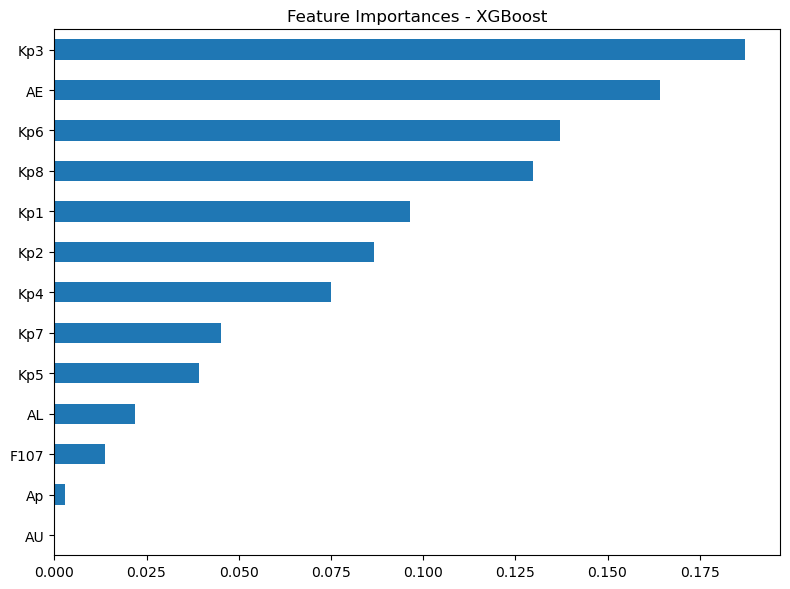

In [72]:
import pandas as pd

importances = pd.Series(xgb_best.feature_importances_, index=selected_features)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), title='Feature Importances - XGBoost')
plt.tight_layout()
plt.show()
